<a href="https://colab.research.google.com/github/ArtemKhadris/freeCodeCamp-Linear-Regression-Health-Costs-Calculator/blob/main/Linear_Regression_Health_Costs_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [227]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [228]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
df = pd.read_csv('insurance.csv')
df.tail()

--2023-04-07 23:34:27--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.13’

insurance.csv.13    100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2023-04-07 23:34:27 (3.84 MB/s) - ‘insurance.csv.13’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [229]:
# Change non-numeric to numeric
for name, column in df.items():
    if column.dtype == object:
        unique_values = df[name].unique()
        df[name].replace(unique_values, np.arange(len(unique_values)), inplace=True)
    
# 80% for train, 20% for test
dftrain = df.sample(frac=0.8)
dfeval = df.drop(dftrain.index)
y_train = dftrain.pop('expenses')
y_eval = dfeval.pop('expenses')

# Normalization
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(dftrain))

# Configuration the model
model = tf.keras.Sequential([normalizer, layers.Dense(20), layers.Dense(20, activation='relu'), layers.Dense(5), layers.Dense(1)])
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.03),
    loss="mse", metrics=["mae", "mse"])

# Training the model
history = model.fit(
    dftrain,
    y_train,
    batch_size=32,
    epochs=50,
    verbose=0)

# Making it ready for test section
test_dataset, test_labels = dfeval, y_eval

9/9 - 1s - loss: 22698350.0000 - mae: 3342.5044 - mse: 22698350.0000 - 626ms/epoch - 70ms/step
Testing set Mean Abs Error: 3342.50 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 6ms/step


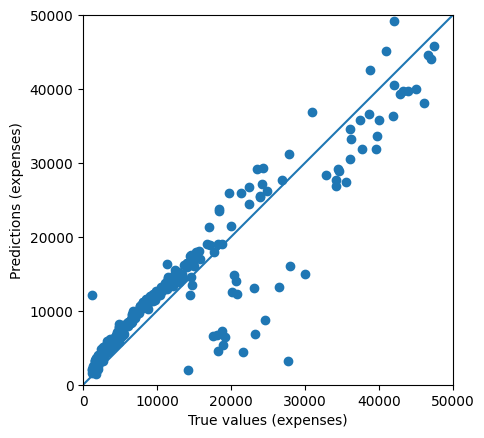

In [230]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
